# Tweet Sentiment Analysis
![tweet_sentiment](./images/tweet_sentiment.jpg)

# Overview
An investment company wants to invest in the stock of one of two companies, Apple and  Google. Visualizations and text summaries are included at the end.

#  Business Problem
An investment company is collecting information to make a decision before investing in the stock of one of two companies, Apple and Google, and they are interested in market performance based on customer reviews. One way to check the reviews is to check customerss tweet sentiments. Based on tweet sentiments, one of two companies will be recommended.

# Data Understanding

The dataset has 3 columns, Tweet text, brand, and emotion rating. The dataset contains more than 9000 texts.

In [1]:
# import necessar libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# read data
data = pd.read_csv("./data/tweet_sentiment_analysis.csv", encoding='latin1')

In [3]:
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


# Data Cleaning
## Handling Missing Values
Below shows all column with the number of missing values.

In [5]:
data.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

There is one missing value in the tweet_text column. Therefore, it is deleted.


In [6]:
# drop missing text
data.dropna(subset = ['tweet_text'], inplace = True)

In [7]:
data.isna().sum()

tweet_text                                               0
emotion_in_tweet_is_directed_at                       5801
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

## Renaming column names
Long column names are shortened for coding convenience and readability.

In [8]:
data.rename(columns={"emotion_in_tweet_is_directed_at": "brand", 
                     "is_there_an_emotion_directed_at_a_brand_or_product": "emotion"
                    },
            inplace = True
           )

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9092 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_text  9092 non-null   object
 1   brand       3291 non-null   object
 2   emotion     9092 non-null   object
dtypes: object(3)
memory usage: 284.1+ KB


In [10]:
pd.set_option('max_colwidth', 400)

data.head()

,tweet_text,brand,emotion
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative emotion
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,Negative emotion
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",Google,Positive emotion


## Tweet text cleaning
Below steps will do cleaning that is specifically designed for tweet texts. The reference is from this [link](https://towardsdatascience.com/another-twitter-sentiment-analysis-bb5b01ebad90). Steps below will be helpful tokenizing the texts.

1. Clean up HTML encodings by removing &amp, &quot, etc.

In [11]:
# example 1 text
data.tweet_text[4]

"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)"

In [12]:
# example 2 text
data.tweet_text[36]

'The best!  RT @mention Ha! First in line for #ipad2 at #sxsw &quot;pop-up&quot; Apple store was an event planner #eventprofs #pcma #engage365'

In [13]:
# HTML decoding
# removes &amp, &quot, etc
# cleaned example 1 text
from bs4 import BeautifulSoup
example1 = BeautifulSoup(data.tweet_text[4], 'lxml')
print(example1.get_text())

@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) & Matt Mullenweg (Wordpress)


In [14]:
# HTML decoding
# removes &amp, &quot, etc
# cleaned example 2 text
example2 = BeautifulSoup(data.tweet_text[36], 'lxml')
print(example2.get_text())

The best!  RT @mention Ha! First in line for #ipad2 at #sxsw "pop-up" Apple store was an event planner #eventprofs #pcma #engage365


2. Clean up mentions by removing @mention.

In [15]:
# removes @mentions
# cleaned example 1 text
import re
re.sub(r'@[A-Za-z0-9]+','',example1.get_text())

" great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) & Matt Mullenweg (Wordpress)"

3. Clean up URLs by removing them.

In [16]:
# example 3 text
data.tweet_text[6478]

'RT @mention Retrollect is now also in Android Market! #SxSW https://market.android.com/details?id=com.borderstylo.retrollect'

In [17]:
# removes URL links
# cleaned example 3 text
re.sub('https?://[A-Za-z0-9./?/=]+','',data.tweet_text[6478])

'RT @mention Retrollect is now also in Android Market! #SxSW '

4. Pick only letters.

In [18]:
# letters only
# example 2 text
re.sub("[^a-zA-Z]", " ", example2.get_text())

'The best   RT  mention Ha  First in line for  ipad  at  sxsw  pop up  Apple store was an event planner  eventprofs  pcma  engage   '

The above steps are combined and applied to every text in the dataset.

In [19]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

import code.data_preparation as dp

data.tweet_text = data.tweet_text.apply(dp.cleaning)

data.head()

,tweet_text,brand,emotion
0,i have a g iphone after hrs tweeting at rise austin it was dead i need to upgrade plugin stations at sxsw,iPhone,Negative emotion
1,know about awesome ipad iphone app that you ll likely appreciate for its design also they re giving free ts at sxsw,iPad or iPhone App,Positive emotion
2,can not wait for ipad also they should sale them down at sxsw,iPad,Positive emotion
3,i hope this year s festival isn t as crashy as this year s iphone app sxsw,iPad or iPhone App,Negative emotion
4,great stuff on fri sxsw marissa mayer google tim o reilly tech books conferences matt mullenweg wordpress,Google,Positive emotion


## Cleaning target columns
This would transform the brand column and emotion column in to columns with three categories.
### Frequency Check
Frequency of values are checked before merging same categories.

In [20]:
# the target
data.brand.value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: brand, dtype: int64

In [21]:
data.emotion.value_counts()

No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: emotion, dtype: int64

### Categorization

In [22]:
# Updating 'No emotion toward brand or product' to 'No Emotion' for the readability.
data.emotion.loc[data.emotion == 'No emotion toward brand or product'] = 'No Emotion'

Texts with available brand information are categorized based on brand information.
1. 'iOS' - Apple's mobile products
2. 'Android' - Google's mobile products
3. 'Apple' - Apple's other products
4. 'Google' - Google's other products

In [23]:
# determine categories by catching words in the brand column
def pick(brand):
    if brand in ['iPad or iPhone App', 'iPad', 'iPhone']:
        return 'iOS'
    elif brand in ['Android App', 'Android']:
        return 'Android'
    elif brand in ['Apple', 'Other Google product or service']:
        return 'Apple'
    elif brand in ['Google', 'Other Google product or service']:
        return 'Google'
    else:
        return 'None'

In [24]:
data['brand_label'] = data.brand.apply(pick)

In [25]:
data.brand_label.value_counts()

None       5836
iOS        1713
Apple       954
Google      430
Android     159
Name: brand_label, dtype: int64

# Analysis
The data can be separated into two sets, texts with brand information and texts without brand information. The texts with brand information are already categorized in the above step. The texts without brand information will be categorized by predicting what words exist in the texts. We will train the data using texts with available brand information, then use the trained model to predict/categorize texts without brand information.

The texts without brand information (64% of data) are not useful for now, but once the texts are categorized, much more information is gathered thus making findings more valuable.
## Brand Prediction
Before the analysis, the data is split into data with brand information and data without brand information. 

In [26]:
data_no_target = data.loc[data.brand_label == 'None']
data_with_target = data.loc[data.brand_label != 'None']

In [27]:
# length of data without brand information
len(data_no_target)

5836

In [28]:
# length of data with brand information
len(data_with_target)

3256

Using data_with_target data, prediction steps are started.

1. Encoding the target column.

In [29]:
# build a function for encoding target values
trans = {'None' : 0,
         'iOS' : 1,
         'Apple' : 2,
         'Android' : 3,
         'Google' : 4
        }

def transform_target(data):
    for k, v in trans.items():
        if data == k:
            data = v
        else:
            pass
    return data

In [30]:
data_with_target['target'] = data_with_target.brand_label.apply(transform_target)

In [31]:
# examples of encoded target
data_with_target.head()

,tweet_text,brand,emotion,brand_label,target
0,i have a g iphone after hrs tweeting at rise austin it was dead i need to upgrade plugin stations at sxsw,iPhone,Negative emotion,iOS,1
1,know about awesome ipad iphone app that you ll likely appreciate for its design also they re giving free ts at sxsw,iPad or iPhone App,Positive emotion,iOS,1
2,can not wait for ipad also they should sale them down at sxsw,iPad,Positive emotion,iOS,1
3,i hope this year s festival isn t as crashy as this year s iphone app sxsw,iPad or iPhone App,Negative emotion,iOS,1
4,great stuff on fri sxsw marissa mayer google tim o reilly tech books conferences matt mullenweg wordpress,Google,Positive emotion,Google,4


In [32]:
data_with_target['target'].value_counts()

1    1713
2     954
4     430
3     159
Name: target, dtype: int64

2. Train-test split on data_with_target. The train set size is 75% of the whole data.

In [33]:
from sklearn.model_selection import train_test_split

train_text, test_text, train_target, test_target = train_test_split(data_with_target.tweet_text, 
                                                                    data_with_target.target,
                                                                    random_state=42
                                                                   )

### Baseline Models
Below steps show how a baseline model is selected.

In [34]:
# import libraries
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [35]:
# instantiate vectorizers without tuning
tfidf = TfidfVectorizer(max_features=10)
cv = CountVectorizer(max_features=10)

In [36]:
# building pipelines without tuning
lr_t =  Pipeline([('tfidf', tfidf), ('Logistic Regression', LogisticRegression(random_state = 0))])
rfc_t =  Pipeline([('tfidf', tfidf), ('Random Forest', RandomForestClassifier(random_state = 0))])
svc_t =  Pipeline([('tfidf', tfidf), ('Support Vector', SVC(random_state = 0))])
nb_t =  Pipeline([('tfidf', tfidf), ('Naive Bayes', MultinomialNB())])
lr_c =  Pipeline([('cv', cv), ('Logistic Regression', LogisticRegression(random_state = 0))])
rfc_c =  Pipeline([('cv', cv), ('Random Forest', RandomForestClassifier(random_state = 0))])
svc_c =  Pipeline([('cv', cv), ('Support Vector', SVC(random_state = 0))])
nb_c =  Pipeline([('cv', cv), ('Naive Bayes', MultinomialNB())])

models = [('Logistic Regression tfidf', lr_t),
          ('Random Forest tfidf', rfc_t),
          ('Support Vector tfidf', svc_t),
          ('Naive Bayes tfidf', nb_t),
          ('Logistic Regression cv', lr_c),
          ('Random Forest cv', rfc_c),
          ('Support Vector cv', svc_c),
          ('Naive Bayes cv', nb_c)
         ]

In [37]:
# Validation scores
[(name, cross_val_score(model, train_text, train_target, cv=5).mean()) for name, model in models]

[('Logistic Regression tfidf', 0.8144967984176473),
 ('Random Forest tfidf', 0.8050722451305775),
 ('Support Vector tfidf', 0.8218671427134667),
 ('Naive Bayes tfidf', 0.749393207951993),
 ('Logistic Regression cv', 0.814906634483221),
 ('Random Forest cv', 0.805482919306715),
 ('Support Vector cv', 0.8157263066143686),
 ('Naive Bayes cv', 0.7985333065137953)]

In [38]:
# Accuracy scores using test data from train-test split
def accuracy(model):
    model.fit(train_text, train_target)
    pred_target = model.predict(test_text)
    return accuracy_score(test_target, pred_target)

In [39]:
[(name, accuracy(model)) for name, model in models]

[('Logistic Regression tfidf', 0.7886977886977887),
 ('Random Forest tfidf', 0.8034398034398035),
 ('Support Vector tfidf', 0.8071253071253072),
 ('Naive Bayes tfidf', 0.7174447174447175),
 ('Logistic Regression cv', 0.7948402948402948),
 ('Random Forest cv', 0.800982800982801),
 ('Support Vector cv', 0.7960687960687961),
 ('Naive Bayes cv', 0.7874692874692875)]

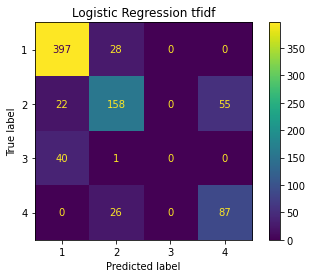

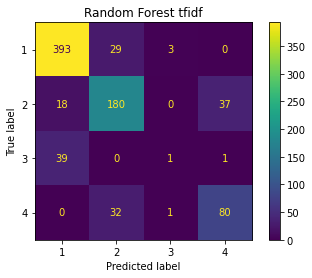

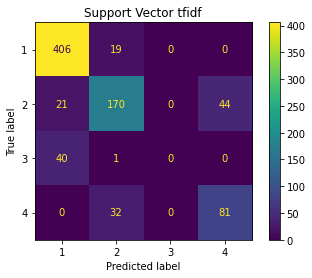

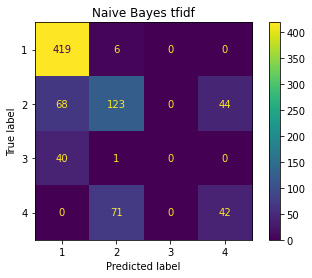

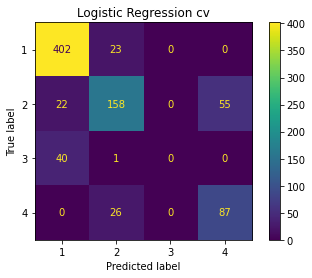

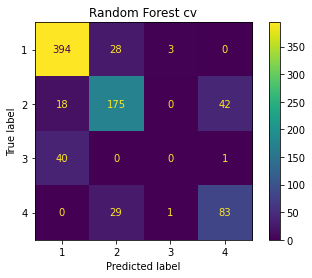

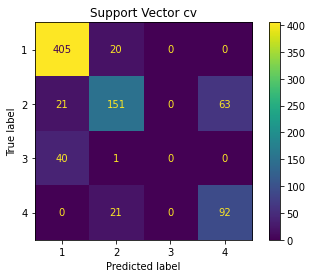

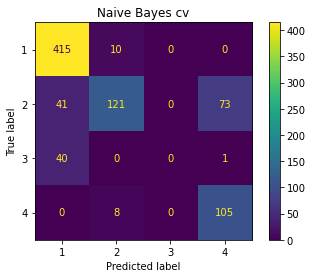

In [40]:
# confusion matrix

from sklearn.metrics import plot_confusion_matrix
for name, model in models:
    
    disp = plot_confusion_matrix(model, test_text, test_target)
    disp.ax_.set_title(name)    

#### Baseline model selection summary
1. The highest validation score and accuracy score are found by using Tfidf vectorizer. Therefore, only Tfidf is kept for the further analysis.
2. Naive Bayes has the lowest scores, but this model is kept for the reference.
3. Confusion matrices shows '3' is barely predicted where '3' is Android or Google's mobile products. Hopefully, next section would capture more '3's. 

### Iterative Approach
####  Stopwords
The first iterative step is to filter stopwords on tfidf instantiation.

In [41]:
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')

In [42]:
# stopword coding is included during tfidf instantiation
tfidf = TfidfVectorizer(max_features=10, stop_words=stopwords_list)
lr_t =  Pipeline([('tfidf', tfidf), ('Logistic Regression', LogisticRegression(random_state = 0))])
rfc_t =  Pipeline([('tfidf', tfidf), ('Random Forest', RandomForestClassifier(random_state = 0))])
svc_t =  Pipeline([('tfidf', tfidf), ('Support Vector', SVC(random_state = 0))])
nb_t =  Pipeline([('tfidf', tfidf), ('Naive Bayes', MultinomialNB())])

In [43]:
models_1 = [('Logistic Regression tfidf', lr_t),
            ('Random Forest tfidf', rfc_t),
            ('Support Vector tfidf', svc_t),
            ('Naive Bayes tfidf', nb_t)
           ]

In [44]:
# validation scores
[(name, cross_val_score(model, train_text, train_target, cv=5).mean()) for name, model in models_1]

[('Logistic Regression tfidf', 0.848483857990546),
 ('Random Forest tfidf', 0.8501206879211505),
 ('Support Vector tfidf', 0.854215696134634),
 ('Naive Bayes tfidf', 0.8034396057527908)]

In [45]:
# accuracy scores
[(name, accuracy(model)) for name, model in models_1]

[('Logistic Regression tfidf', 0.8353808353808354),
 ('Random Forest tfidf', 0.8366093366093366),
 ('Support Vector tfidf', 0.8390663390663391),
 ('Naive Bayes tfidf', 0.7862407862407862)]

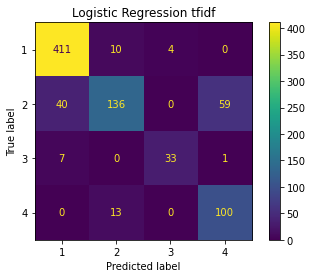

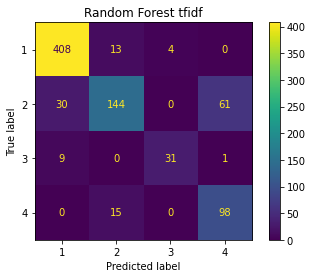

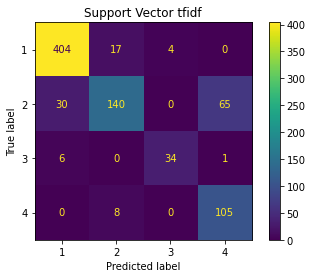

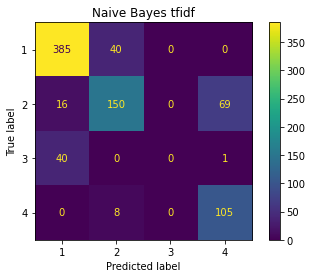

In [46]:
# more confusion matrices
for name, model in models_1:
    
    disp = plot_confusion_matrix(model, test_text, test_target)
    disp.ax_.set_title(name)   

#### More summary
1. Validation scores and accuracy scores are improved.
2. Confusion matrices now catches more '3's except for Naive Bayes.

### Final Model Part 1
SVC model has the highest scores for both validation and accuracy. 

Max_features during tfidf instantiation is increased from 10 to 100 meaning it will select top 100 words instead of 10 words.

In [47]:
tfidf = TfidfVectorizer(max_features=100, stop_words=stopwords_list)
final_model =  Pipeline([('tfidf', tfidf), ('Support Vector', SVC(random_state = 0))])

In [48]:
cross_val_score(final_model, train_text, train_target, cv=5).mean()

0.9049943008481678

In [49]:
accuracy(final_model)

0.8869778869778869

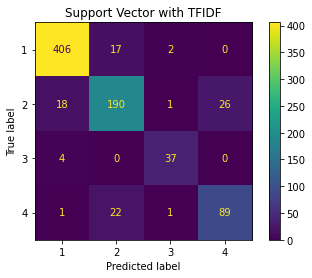

In [50]:
disp = plot_confusion_matrix(final_model, test_text, test_target)
disp.ax_.set_title('Support Vector with TFIDF');

The scores are a lot more improved.

## Final Model Part 2

Gridsearch is used to see if SVC model can be improved.

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
pipe = Pipeline([('tfidf', tfidf), ('svc', SVC(random_state = 0))])
param = {'svc__C': [0.1, 1, 10, 100, 1000],
         'svc__gamma': ['auto' ,'scale', 1, 0.1, 0.01, 0.001, 0.0001],
         'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']}
gs = GridSearchCV(estimator=pipe,
                  param_grid=param,
                  cv=5)
gs.fit(train_text, train_target)
gs.best_params_

{'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}

The best parameters are just the default values. No further tuning is done.
## Merging Predicted Brand to the Data
The fitted final model is used to predict and categorize missing brand information.

In [53]:
final_model.fit(train_text, train_target)
pred_target = final_model.predict(data_no_target.tweet_text)
data_no_target['target'] = pred_target

In [54]:
# function to decode target values to the names of categories
def inv_transform_target(data):
    for k, v in trans.items():
        if data == v:
            data = k
        else:
            pass
    return data

In [55]:
data_no_target['brand_label'] = data_no_target['target'].apply(inv_transform_target)

In [56]:
# examples of labled column for brand_label
data_no_target.head()

,tweet_text,brand,emotion,brand_label,target
5,new ipad apps for speechtherapy and communication are showcased at the sxsw conference iear edchat asd,NaN,No Emotion,iOS,1
16,holler gram for ipad on the itunes app store via is ken sxsw,NaN,No Emotion,iOS,1
32,attn all sxsw frineds register for gdgtlive and see cobra iradar for android link,NaN,No Emotion,Android,3
33,anyone at sxsw want to sell their old ipad,NaN,No Emotion,iOS,1
34,anyone at sxsw who bought the new ipad want to sell their older ipad to me,NaN,No Emotion,iOS,1


In [57]:
# examples of whole dataset
data = pd.concat([data_with_target, data_no_target], axis = 0)
data.sort_index(inplace = True)
data

,tweet_text,brand,emotion,brand_label,target
0,i have a g iphone after hrs tweeting at rise austin it was dead i need to upgrade plugin stations at sxsw,iPhone,Negative emotion,iOS,1
1,know about awesome ipad iphone app that you ll likely appreciate for its design also they re giving free ts at sxsw,iPad or iPhone App,Positive emotion,iOS,1
2,can not wait for ipad also they should sale them down at sxsw,iPad,Positive emotion,iOS,1
3,i hope this year s festival isn t as crashy as this year s iphone app sxsw,iPad or iPhone App,Negative emotion,iOS,1
4,great stuff on fri sxsw marissa mayer google tim o reilly tech books conferences matt mullenweg wordpress,Google,Positive emotion,Google,4
...,...,...,...,...,...
9088,ipad everywhere sxsw link,iPad,Positive emotion,iOS,1
9089,wave buzz rt we interrupt your regularly scheduled sxsw geek programming with big news link google circles,NaN,No Emotion,Apple,2
9090,google s zeiger a physician never reported potential ae yet fda relies on physicians we re operating w out data sxsw health dev,NaN,No Emotion,Google,4
9091,some verizon iphone customers complained their time fell back an hour this weekend of course they were the new yorkers who attended sxsw,NaN,No Emotion,iOS,1


In [58]:
data.brand_label.value_counts()

iOS        4497
Apple      2691
Google     1491
Android     413
Name: brand_label, dtype: int64

In [59]:
data.emotion.value_counts()

No Emotion          5388
Positive emotion    2978
Negative emotion     570
I can't tell         156
Name: emotion, dtype: int64

In [60]:
# selecting data for Apple
data_apple = data.loc[(data.brand_label == 'iOS') | (data.brand_label == 'Apple')]

In [61]:
len(data_apple)

7188

In [62]:
# selecting data for Google
data_google = data.loc[(data.brand_label == 'Android') | (data.brand_label == 'Google')]

In [63]:
len(data_google)

1904

# Result

## Visualization

In [64]:
import code.visualizations as viz

- **Overall emotion percentages for Apple**

In [65]:
data_apple.emotion.value_counts()

No Emotion          4171
Positive emotion    2417
Negative emotion     473
I can't tell         127
Name: emotion, dtype: int64

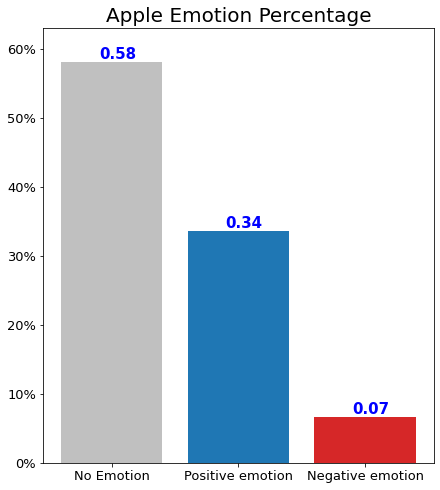

In [66]:
viz.result(data_apple.emotion.value_counts(normalize=True), 
           'Apple Emotion Percentage', 
           ['silver','tab:blue','tab:red'])

- **Emotion percentages for Apple's mobile products**

In [67]:
data_apple.emotion.loc[data_apple.brand_label == 'iOS'].value_counts()

No Emotion          2543
Positive emotion    1559
Negative emotion     317
I can't tell          78
Name: emotion, dtype: int64

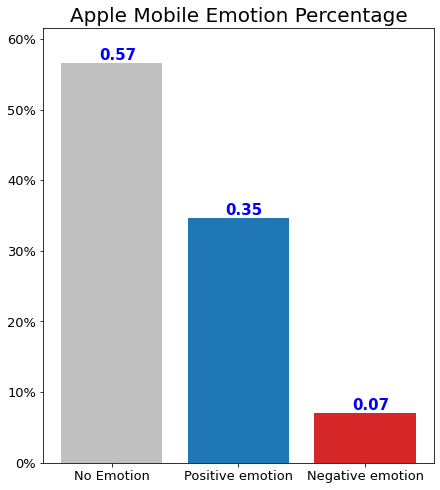

In [68]:
gdata = data_apple.emotion.loc[data_apple.brand_label == 'iOS'].value_counts(normalize=True)
viz.result(gdata, 
           'Apple Mobile Emotion Percentage', 
           ['silver','tab:blue','tab:red'])

- **Emotion percentages for Apple's other products**

In [69]:
data_apple.emotion.loc[data_apple.brand_label == 'Apple'].value_counts()

No Emotion          1628
Positive emotion     858
Negative emotion     156
I can't tell          49
Name: emotion, dtype: int64

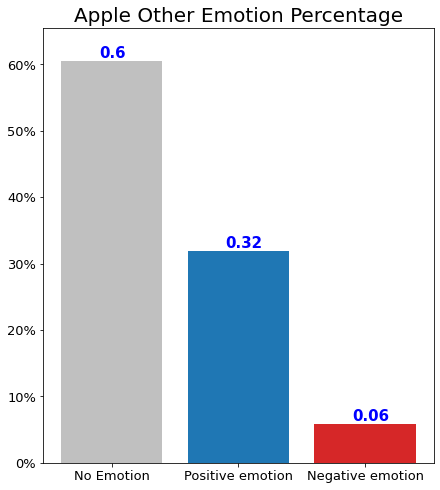

In [70]:
gdata = data_apple.emotion.loc[data_apple.brand_label == 'Apple'].value_counts(normalize=True)
viz.result(gdata, 
           'Apple Other Emotion Percentage', 
           ['silver','tab:blue','tab:red'])

- **Overall emotion percentages for Google**

In [71]:
data_google.emotion.value_counts()

No Emotion          1217
Positive emotion     561
Negative emotion      97
I can't tell          29
Name: emotion, dtype: int64

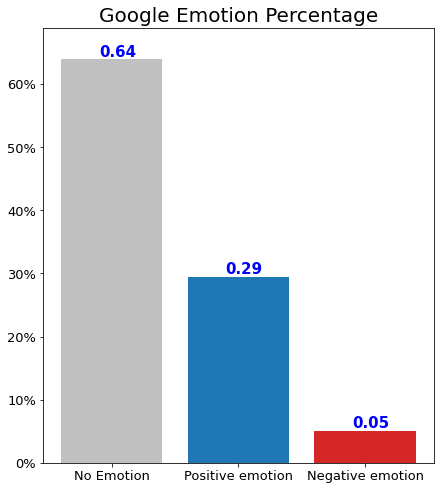

In [72]:
viz.result(data_google.emotion.value_counts(normalize=True), 
           'Google Emotion Percentage', 
           ['silver','tab:blue','tab:red'])

- **Emotion percentages for Google's mobile products**

In [73]:
data_google.emotion.loc[data_google.brand_label == 'Android'].value_counts()

No Emotion          236
Positive emotion    156
Negative emotion     19
I can't tell          2
Name: emotion, dtype: int64

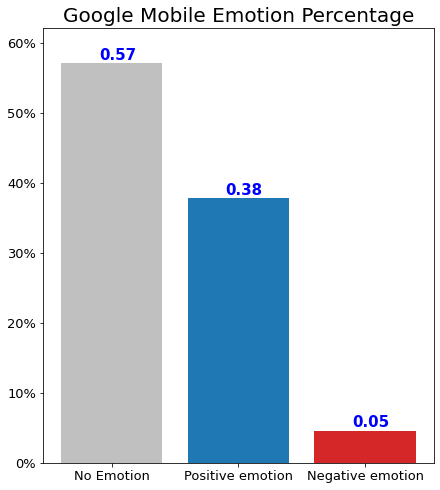

In [74]:
gdata = data_google.emotion.loc[data_google.brand_label == 'Android'].value_counts(normalize=True)
viz.result(gdata, 
           'Google Mobile Emotion Percentage', 
           ['silver','tab:blue','tab:red'])

- **Emotion percentages for Google's other products**

In [75]:
data_google.emotion.loc[data_google.brand_label == 'Google'].value_counts()

No Emotion          981
Positive emotion    405
Negative emotion     78
I can't tell         27
Name: emotion, dtype: int64

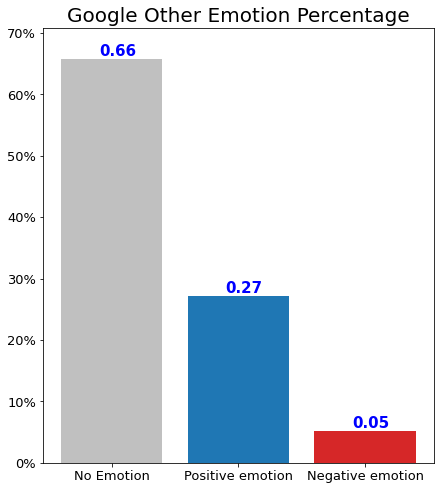

In [76]:
gdata = data_google.emotion.loc[data_google.brand_label == 'Google'].value_counts(normalize=True)
viz.result(gdata, 
           'Google Other Emotion Percentage', 
           ['silver','tab:blue','tab:red'])

The six graphs above shows high rate of "no emotion" where "no emotion" can be questions, requests, answers, or general information. To see which brand has more worth investing in, we should check the ratio between positive emotion and negative emotion.

In [77]:
# Creating a table with counts
ratio = pd.DataFrame({'Brand': ['Apple', 'Google', 'Apple', 'Google', 'Apple', 'Google'],
                      'Category': ['Overall', 'Overall', 'Mobile', 'Mobile', 'Others', 'Others'],
                      'Positive': [2417, 561, 1559, 156, 858, 405],
                      'Negative': [473, 97, 317, 19, 156, 78]
                     }
                    )
# Calculating ratio
ratio['Ratio'] = round(ratio.Negative / ratio.Positive, 2)

ratio

,Brand,Category,Positive,Negative,Ratio
0,Apple,Overall,2417,473,0.20
1,Google,Overall,561,97,0.17
2,Apple,Mobile,1559,317,0.20
3,Google,Mobile,156,19,0.12
4,Apple,Others,858,156,0.18
5,Google,Others,405,78,0.19


Google has generally lower ratio where lower ratio means the number of negatives is lower compared to the number of positives.

## The Most Frequent Words
Below steps shows which words have the most counts in the all texts within each category.

In [78]:
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk import word_tokenize

In [79]:
# removing stop words
stopwords_list = stopwords.words('english')

In [80]:
# keywords in Apple's positive texts
all_apple_positive_text = data_apple.loc[data_apple.emotion == 'Positive emotion'].tweet_text.map(word_tokenize).values
all_apple_pos_total_vocab = [word for tweet_text in all_apple_positive_text for word in tweet_text]
all_apple_pos_words_stopped = [word for word in all_apple_pos_total_vocab if word not in stopwords_list]
FreqDist(all_apple_pos_words_stopped).most_common(50)

[('sxsw', 2578),
 ('ipad', 1246),
 ('link', 1029),
 ('apple', 926),
 ('rt', 770),
 ('store', 548),
 ('iphone', 541),
 ('app', 336),
 ('google', 302),
 ('new', 299),
 ('austin', 279),
 ('pop', 214),
 ('launch', 141),
 ('one', 139),
 ('get', 134),
 ('line', 124),
 ('via', 117),
 ('cool', 107),
 ('day', 100),
 ('time', 100),
 ('circles', 98),
 ('free', 96),
 ('like', 95),
 ('today', 94),
 ('great', 91),
 ('social', 91),
 ('temporary', 89),
 ('downtown', 87),
 ('opening', 87),
 ('maps', 86),
 ('go', 86),
 ('sxswi', 83),
 ('awesome', 78),
 ('love', 77),
 ('popup', 77),
 ('got', 76),
 ('w', 75),
 ('apps', 73),
 ('network', 69),
 ('even', 67),
 ('open', 66),
 ('mobile', 66),
 ('good', 64),
 ('check', 62),
 ('first', 61),
 ('wins', 56),
 ('want', 56),
 ('around', 56),
 ('going', 55),
 ('video', 55)]

- Keywords found in Apple's positive texts are sxsw, link, store, app, new, austin, launch, line, cool, circles.

In [81]:
# keywords in Google's positive texts
all_google_pos_text = data_google.loc[data_google.emotion == 'Positive emotion'].tweet_text.map(word_tokenize).values
all_google_pos_total_vocab = [word for tweet_text in all_google_pos_text for word in tweet_text]
all_google_pos_words_stopped = [word for word in all_google_pos_total_vocab if word not in stopwords_list]
FreqDist(all_google_pos_words_stopped).most_common(50)

[('sxsw', 575),
 ('google', 434),
 ('link', 188),
 ('rt', 167),
 ('android', 164),
 ('party', 104),
 ('app', 64),
 ('new', 61),
 ('mayer', 50),
 ('great', 46),
 ('marissa', 43),
 ('mobile', 36),
 ('w', 33),
 ('social', 33),
 ('search', 32),
 ('good', 31),
 ('team', 31),
 ('free', 30),
 ('time', 29),
 ('people', 29),
 ('get', 24),
 ('circles', 24),
 ('best', 23),
 ('check', 23),
 ('see', 22),
 ('bing', 22),
 ('thanks', 22),
 ('maps', 20),
 ('fun', 20),
 ('panel', 20),
 ('today', 20),
 ('like', 20),
 ('think', 19),
 ('launch', 19),
 ('network', 19),
 ('big', 19),
 ('speak', 18),
 ('austin', 18),
 ('gowalla', 17),
 ('future', 17),
 ('awesome', 17),
 ('digital', 17),
 ('market', 17),
 ('come', 16),
 ('got', 16),
 ('physical', 16),
 ('love', 15),
 ('work', 15),
 ('via', 15),
 ('choice', 15)]

- Keywords found in Google's positive texts are sxsw, link, party, app, new, mayer, great, mobile, social, search.

# Conclusions
- **Investing in Google is recommended vs. Apple because Google has a lower ratio of negative emotion by positive emotion.** 
- **Other than ‘sxsw’, ‘link’, ‘app’, ‘new’, two brands have different keywords found in their sentiments.**

### Next Steps
Further analysis could help the government gain more insight into understanding people without vaccination.

- **Select tweets including one or more keywords.** There are several words that appear in tweets much more frequently than the rest words. We can try to compare the positive rates based on tweets containing one or more keywords.
- **Investigate SXSW.** The most frequent keyword in sentiments is SXSW. It might mean something to seek a relationship between Apple and SXSW.
- Share the full list of keywords with the client.